In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd  drive/My Drive/BrewingDataCup/

/content/drive/My Drive/BrewingDataCup


In [3]:
import pandas as pd

clients_df = pd.read_csv("clients_attributes.csv")
sales_df = pd.read_csv("sales.csv",encoding="iso8859-1")
active_promos_df = pd.read_csv("active_promos.csv")
executed_promos_df = pd.read_csv("executed_promos.csv")
test_df = pd.read_csv("test.csv")

In [4]:
executed_promos_df['Exec']=1

In [5]:
training_data = active_promos_df.merge(executed_promos_df, on=['Cliente','CodigoDC','Marca','Cupo'], how='left')
training_data.head(10)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Exec
0,297601,29,9,2018-08-06,2018-08-30,3213,NaN
1,297601,29,9,2018-08-06,2018-08-30,3795,NaN
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0
5,309962,40,16,2018-08-12,2018-08-24,7159,1.0
6,310695,40,16,2018-08-12,2018-08-19,2218,1.0
7,311170,40,16,2018-08-12,2018-08-22,7189,1.0
8,311276,40,16,2018-08-12,2018-08-19,1644,1.0
9,311283,40,16,2018-08-12,2018-08-21,7114,1.0


In [6]:
training_data['Exec'] = training_data['Exec'].fillna(0)
training_data

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Exec
0,297601,29,9,2018-08-06,2018-08-30,3213,0.0
1,297601,29,9,2018-08-06,2018-08-30,3795,0.0
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0
...,...,...,...,...,...,...,...
422432,688354,40,16,2019-09-25,2019-09-26,14435,0.0
422433,688355,29,9,2019-09-25,2019-09-26,320,0.0
422434,688355,29,9,2019-09-25,2019-09-26,3117,0.0
422435,688355,29,9,2019-09-25,2019-09-26,3503,0.0


In [7]:
training_data['Fecha_Desde']=pd.to_datetime(training_data['Fecha_Desde'])
training_data.loc[training_data['Fecha_Desde']<'2019-09-01']['Exec'].mean()

0.07202831997843867

In [51]:
ls

 drive/        'training_data_bruto (2) (1).obj'   training_data_final.pickle
 sample_data/   training_data_bruto.obj


In [53]:
import pickle
with open('./training_data_bruto_2.obj', 'rb') as fp:
  training_data= pickle.load(fp)

In [54]:
training_data

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec,Duration
0,29,9,1,1,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,126,4,21,12,1,1,1,0.0,7
1,29,9,1,0,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,126,4,21,12,1,1,1,0.0,9
2,29,9,1,0,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,126,4,21,12,1,1,1,0.0,9
3,39,20,1,12,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,126,4,21,12,1,1,1,0.0,1
4,39,20,1,12,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,126,4,21,12,1,1,1,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,40,16,14994,5,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,7,4,6,10,2,1,0,0.0,26
422433,40,16,14994,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,7,4,6,10,2,1,0,0.0,160
422434,40,16,15060,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.012500,-0.000000,0.012500,-0.000000,0.00,0.000000,6,4,22,9,1,1,0,0.0,160
422435,40,16,15063,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,6,4,6,9,2,2,0,0.0,160


In [55]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

training_data['Fecha_Desde'] = training_data.apply(lambda x: pd.to_datetime('2019-09-02') - relativedelta(months=x['Año-Mes']), axis=1)

In [56]:
training_data['Exec']= training_data['Exec'].cat.codes
training_data

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec,Duration,Fecha_Desde
0,29,9,1,1,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,126,4,21,12,1,1,1,0,7,2019-08-02
1,29,9,1,0,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,126,4,21,12,1,1,1,0,9,2019-09-02
2,29,9,1,0,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,126,4,21,12,1,1,1,0,9,2019-09-02
3,39,20,1,12,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,126,4,21,12,1,1,1,0,1,2018-09-02
4,39,20,1,12,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,126,4,21,12,1,1,1,0,9,2018-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,40,16,14994,5,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,7,4,6,10,2,1,0,0,26,2019-04-02
422433,40,16,14994,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,7,4,6,10,2,1,0,0,160,2019-05-02
422434,40,16,15060,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.012500,-0.000000,0.012500,-0.000000,0.00,0.000000,6,4,22,9,1,1,0,0,160,2019-05-02
422435,40,16,15063,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,6,4,6,9,2,2,0,0,160,2019-05-02


In [57]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

training_data['Fecha_Desde']=pd.to_datetime(training_data['Fecha_Desde'])

def avg_6M_exec(row):
  print(row.Cliente)
  date_minus_n_months = row['Fecha_Desde'] - relativedelta(months=6)
  rows_to_agg = training_data.loc[(training_data['Cliente']==row['Cliente']) &
                      (training_data['Marca']==row['Marca']) &
                      (training_data['Cupo']==row['Cupo']) & 
                      (training_data['Fecha_Desde']>=date_minus_n_months) &
                      (training_data['Fecha_Desde']<row['Fecha_Desde'])]
  if (len(rows_to_agg)==0):
    avg=0.072
  else:
    avg = (rows_to_agg['Exec'].sum()+0.01)/(len(rows_to_agg)+0.01)
  return avg

In [58]:
training_data = training_data.sort_values(by=["Cliente"])

In [ ]:
new_avg = training_data.apply(lambda row: avg_6M_exec(row),axis=1)

In [60]:
training_data['avg_6M_exec'] = new_avg
training_data['Exec'] = pd.Categorical(training_data.Exec)
training_data.drop(['Fecha_Desde'],axis=1,inplace=True)

In [61]:
training_data['Mes'] = training_data.apply(lambda x: (pd.to_datetime('2019-09-02') - relativedelta(months=x['Año-Mes'])).month ,axis=1)

In [62]:
training_data

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec,Duration,avg_6M_exec,Mes
0,29,9,1,1,1,0.02,-0.000000,0.02,-0.000000,0.00,0.0,0.010000,-0.000000,0.010000,-0.000000,0.010000,-0.000000,126,4,21,12,1,1,1,0,7,0.072000,8
22,40,16,1,12,4,0.54,0.024779,0.66,0.020290,0.15,-0.0,0.010000,0.044157,0.032500,0.014861,0.000000,0.000000,126,4,21,12,1,1,1,0,6,0.072000,9
23,40,16,1,12,4,0.54,0.024779,0.66,0.020290,0.15,-0.0,0.010000,0.044157,0.032500,0.014861,0.000000,0.000000,126,4,21,12,1,1,1,0,1,0.072000,9
24,40,16,1,12,4,0.54,0.024779,0.66,0.020290,0.15,-0.0,0.010000,0.044157,0.032500,0.014861,0.000000,0.000000,126,4,21,12,1,1,1,0,9,0.072000,9
25,40,16,1,11,3,0.33,-0.000000,0.60,0.022311,0.00,0.0,0.005000,-0.000000,0.032500,0.014861,0.000000,0.000000,126,4,21,12,1,1,1,0,0,0.002494,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312802,39,20,15068,1,2,0.00,0.000000,0.00,0.000000,0.00,0.0,0.020000,0.126136,0.023333,0.107702,0.006667,0.184067,6,1,5,9,2,3,1,0,13,0.009901,8
312800,39,20,15068,2,1,0.00,0.000000,0.00,0.000000,0.00,0.0,0.016667,0.076121,0.016667,0.076121,0.006667,0.184067,6,1,5,9,2,3,1,0,16,0.072000,7
312799,29,9,15068,1,1,0.01,-0.000000,0.01,-0.000000,0.01,-0.0,0.025000,-0.000000,0.025000,-0.000000,0.015000,-0.000000,6,1,5,9,2,3,1,0,4,0.072000,8
312803,39,20,15068,0,1,0.00,0.000000,0.00,0.000000,0.00,0.0,0.013333,0.184067,0.023333,0.107702,0.000000,0.000000,6,1,5,9,2,3,1,0,6,0.003322,9


In [44]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385876 entries, 0 to 385875
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Marca                 385876 non-null  category
 1   Cupo                  385876 non-null  category
 2   Cliente               385876 non-null  category
 3   Año-Mes               385876 non-null  int64   
 4   nProms                385876 non-null  int64   
 5   Hl_sum_3M             385876 non-null  float64 
 6   Dcto_porc_3M          385876 non-null  float64 
 7   Hl_sum_6M             385876 non-null  float64 
 8   Dcto_porc_6M          385876 non-null  float64 
 9   Hl_sum_1M             385876 non-null  float64 
 10  Dcto_porc_1M          385876 non-null  float64 
 11  Hl_sum_prodSim_3M     385876 non-null  float64 
 12  Dcto_porc_prodSim_3M  385876 non-null  float64 
 13  Hl_sum_prodSim_6M     385876 non-null  float64 
 14  Dcto_porc_prodSim_6M  385876 non-nul

In [63]:
import pickle
with open('./training_data_bruto_2.obj', 'wb') as fp:
  pickle.dump(training_data, fp)

In [ ]:
import pickle
with open('avg_base_6M.obj', 'wb') as fp:
  pickle.dump(new_avg, fp)

In [9]:
import pickle
with open('avg_base_6M.obj', 'rb') as fp:
  new_avg=pickle.load(fp)

In [31]:
new_avg

46293     0.010000
262148    0.001110
229230    0.001427
7216      0.009901
257110    0.003322
            ...   
372568    0.003322
357525    0.009901
411001    0.010000
279336    0.010000
335018    0.010000
Length: 422437, dtype: float64

In [11]:
training_data['Exec']=new_avg
training_data.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Exec
46293,355107,39,20,2018-09-05,2018-09-06,1,0.010000
170659,495601,40,16,2018-11-08,2018-11-11,1,0.112098
296492,496475,39,20,2018-11-08,2018-11-16,1,0.001110
371939,671634,39,20,2019-09-11,2019-09-17,1,0.003322
56271,408714,39,20,2018-09-20,2018-09-29,1,0.003322


In [ ]:
training_data.loc[training_data['Exec']==0.01,'Exec'] = 0.072
training_data.head(5)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Exec
46293,355107,39,20,2018-09-05,2018-09-06,1,0.072000
170659,495601,40,16,2018-11-08,2018-11-11,1,0.112098
296492,496475,39,20,2018-11-08,2018-11-16,1,0.001110
371939,671634,39,20,2019-09-11,2019-09-17,1,0.003322
56271,408714,39,20,2018-09-20,2018-09-29,1,0.003322


In [ ]:
import numpy as np
training_data["Exec"]= training_data.groupby(by=['Cliente','Marca','Cupo'])['Exec'].transform(np.mean)

In [ ]:
training_data

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Exec
46293,355107,39,20,2018-09-05,2018-09-06,1,0.006658
170659,495601,40,16,2018-11-08,2018-11-11,1,0.037026
296492,496475,39,20,2018-11-08,2018-11-16,1,0.006658
371939,671634,39,20,2019-09-11,2019-09-17,1,0.006658
56271,408714,39,20,2018-09-20,2018-09-29,1,0.006658
...,...,...,...,...,...,...,...
357525,638067,40,16,2019-08-07,2019-08-20,15068,0.022550
411001,634393,39,20,2019-07-14,2019-07-30,15068,0.022550
279336,634393,40,16,2019-07-14,2019-07-30,15068,0.022550
365997,672950,40,16,2019-09-11,2019-09-17,15068,0.022550


In [ ]:
training_data_trans = training_data[['Cliente','Marca','Cupo','Exec']].drop_duplicates()
training_data_trans

,Cliente,Marca,Cupo,Exec
46293,1,39,20,0.006658
170659,1,40,16,0.037026
260115,1,29,9,0.030601
125274,2,39,20,0.007127
409606,2,40,16,0.007127
...,...,...,...,...
284636,15067,39,20,0.028959
276131,15068,40,16,0.022550
276130,15068,39,20,0.022550
274511,15068,29,9,0.072000


In [ ]:
training_data_trans.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
test_df_output = test_df.merge(training_data_trans, on=['Cliente','Marca','Cupo'], how='left')

In [ ]:
test_df_output['Ejecuto_Promo']=test_df_output['Exec']

In [ ]:
test_df_output=test_df_output[['Cliente','Marca','Cupo','Ejecuto_Promo']]
test_df_output

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.075242
1,17,29,9,0.022550
2,37,29,9,0.030601
3,46,29,9,0.228901
4,48,29,9,0.022963
...,...,...,...,...
16865,15053,40,16,0.028959
16866,15054,40,16,0.022550
16867,15056,40,16,0.291383
16868,15057,29,9,0.013930


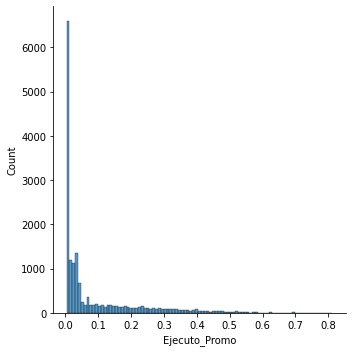

In [ ]:
import seaborn as sns
sns.displot(data=test_df_output, x="Ejecuto_Promo")

In [ ]:
test_df_output.to_csv("output.csv",index=False)

In [ ]:
test_df_output.loc[test_df_output.Ejecuto_Promo == 0, 'Ejecuto_Promo'] = 0.01

In [ ]:
test_df_output.to_csv("output.csv",index=False)

#Validating september test_df

In [ ]:
executed_promos_df2=executed_promos_df.copy()
executed_promos_df2['Exec']=1
executed_promos_df2

,CodigoDC,Cliente,Marca,Cupo,Exec
0,297601,8410,29,9,1
1,297601,9337,29,9,1
2,309843,7404,40,16,1
3,309874,4017,40,16,1
4,309910,6316,40,16,1
...,...,...,...,...,...
27789,651436,9798,39,20,1
27790,651588,2397,39,20,1
27791,651597,4430,40,16,1
27792,651617,7347,39,20,1


In [ ]:
valid_df = executed_promos_df2.merge(active_promos_df, on=['Cliente','Marca','Cupo','CodigoDC'], how='left')
valid_df

,CodigoDC,Cliente,Marca,Cupo,Exec,Fecha_Desde,Fecha_Hasta
0,297601,8410,29,9,1,2018-08-06,2018-08-30
1,297601,9337,29,9,1,2018-08-06,2018-08-30
2,309843,7404,40,16,1,2018-08-12,2018-08-23
3,309874,4017,40,16,1,2018-08-12,2018-08-20
4,309910,6316,40,16,1,2018-08-12,2018-08-17
...,...,...,...,...,...,...,...
27789,651436,9798,39,20,1,2019-08-27,2019-08-30
27790,651588,2397,39,20,1,2019-08-27,2019-08-30
27791,651597,4430,40,16,1,2019-08-27,2019-08-30
27792,651617,7347,39,20,1,2019-08-27,2019-08-30


In [ ]:
valid_df.groupby(by=['Marca','Cupo','Cliente']).count()


CodigoDC  Exec  Fecha_Desde  Fecha_Hasta
Marca Cupo Cliente                                          
29    9    11              1     1            1            1
           15              1     1            1            1
           16              1     1            1            1
           19              1     1            1            1
           21              1     1            1            1
...                      ...   ...          ...          ...
40    16   15037           1     1            1            1
           15039           1     1            1            1
           15049           1     1            1            1
           15056           1     1            1            1
           15062           2     2            2            2

[8426 rows x 4 columns]

In [ ]:
from datetime import datetime as dt

valid_df['Fecha_Desde']=pd.to_datetime(valid_df['Fecha_Desde'])
valid_df=valid_df[valid_df['Fecha_Desde']>'2019-08-31']

In [ ]:
valid_df.groupby(by=['Marca','Cupo','Cliente']).count()
#valid_df

,,,CodigoDC,Exec,Fecha_Desde,Fecha_Hasta
Marca,Cupo,Cliente,,,,


In [ ]:
valid_df

,Cliente,Marca,Cupo,Ejecuto_Promo,CodigoDC,Fecha_Desde,Fecha_Hasta
16,10,40,16,1,683251,2019-09-22,2019-09-26
17,10,40,16,1,672331,2019-09-11,2019-09-17
22,17,29,9,1,659955,2019-09-05,2019-09-14
25,37,29,9,1,660511,2019-09-05,2019-09-14
27,37,29,9,1,659966,2019-09-05,2019-09-14
...,...,...,...,...,...,...,...
288522,15056,40,16,1,672175,2019-09-11,2019-09-17
288527,15057,29,9,1,661117,2019-09-07,2019-09-14
288529,15057,29,9,1,661283,2019-09-07,2019-09-14
288531,15064,29,9,1,659402,2019-09-05,2019-09-14


In [ ]:
valid_df = valid_df.dropna().groupby(by=['Marca','Cupo','Cliente','Fecha_Hasta']).count()